<a href="https://colab.research.google.com/github/isdeniz/results-2406/blob/main/model_nlbse22_dataset_msc_preprocessing_msc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers==4.40.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [2]:
pip install simpletransformers==0.64.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2

In [3]:
import transformers
>>> transformers.__version__

'4.40.2'

In [4]:
import pandas as pd
from functools import partial
import sklearn
import torch
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import datetime
from sklearn.metrics import confusion_matrix # additional line
import seaborn as sns # additional line
import matplotlib.pyplot as plt # additional line
import torch.multiprocessing # additional line
import os # additional line
os.environ["TOKENIZERS_PARALLELISM"] = "false" # additional line
torch.multiprocessing.set_start_method('spawn', force = True) # additional line
pd.set_option('display.max_colwidth', None)
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
torch.multiprocessing.set_sharing_strategy('file_system')
cuda_available = torch.cuda.is_available()
print("Is cuda available?", cuda_available)

Is cuda available? True


load and prepare data

In [21]:
train_1 = pd.read_csv('data/train_nlbse22_msc_preprocessing_part1.csv')
train_2 = pd.read_csv('data/train_nlbse22_msc_preprocessing_part2.csv')
train_3 = pd.read_csv('data/train_nlbse22_msc_preprocessing_part3.csv')
train_4 = pd.read_csv('data/train_nlbse22_msc_preprocessing_part4.csv')

In [22]:
print(train_1.shape[0], train_2.shape[0], train_3.shape[0], train_4.shape[0])

174170 174170 174170 174169


In [23]:
print(train_1.shape[0] + train_2.shape[0] + train_3.shape[0]+ train_4.shape[0])

696679


In [24]:
test = pd.read_csv('data/test_nlbse22_msc_preprocessing.csv')

In [25]:
train = pd.concat([train_1, train_2, train_3, train_4], ignore_index = True)
train.reset_index(drop = True, inplace = True)

print('Number of issues: ', train.shape, test.shape)

Number of issues:  (696679, 2) (80518, 2)


In [26]:
train.head()

text  \
0                                                                                                                                                                                                 2021-05-26T20:57:00Z OWNER 0-Yama/Projet-Final-Python the beginning B we need to add the first file of our project   
1                                                                                                                                                           2020-07-26T20:14:04Z OWNER 0-vortex/dotfiles better touch tool configuration B export better touch tool configuration as a separate package or submodule   
2  2020-12-04T09:33:18Z NONE 00-Evan/shattered-pixel-dungeon request text when wand of regrowth starts producing furrowed grass B i was super confused when this happened. a bit of text would have helped me realize what was going on a lot sooner. the wand is getting old and the new grass is not as healthy. ?   
3                                                                                                        2020-09-22T01:49:32Z OWNER 003MattB/ScheduleBuilderImproved update total credits when cards are removed B total credits is only updated when adding new courses but is never updated when cards are removed   
4                                                                                            2020-09-22T01:52:14Z OWNER 003MattB/ScheduleBuilderImproved delete course from matrix B there is no way to remove courses from the matrix once they have been added. don't forget to update the total credits see issue   

   labels  
0       1  
1       1  
2       1  
3       0  
4       1

In [27]:
test.head()

text  \
0  2020-04-07T09:08:50Z NONE tlnagy/TIFF.jl error keyerror key tiff.sampleformat int 0x0008 not found B one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      2020-11-27T07:17:21Z OWNER tisboyo/Twitch_Bot add database backup to dropbox B nan   
2                                                                                                                                                                                                                                                                                                                                                                                              2021-01-02T19:35:34Z OWNER DrWhoCares/imgdanke add a button method to open the source or output folders B could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.   
3                                                                                                                                                                                                                                                                                                                                                                                         2021-01-02T20:55:34Z OWNER DrWhoCares/imgdanke processes are being started twice B at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       2020-12-29T15:34:35Z OWNER Bean-1/AOT cannot add hp to wall B nan   

   labels  
0       1  
1       1  
2       1  
3       0  
4       0

set the classification layer and training parameters

In [28]:
lr = 3e-5
drp = 0
epochs = 4
batch_t = 100
batch_e = 100
# max_seq = 200
max_seq = 300
name = 'roberta'
ver = 'roberta-base'
output_name = 'outputs/' + name

def create_model(name, ver, lr, drp, epochs, batch_t, batch_e, max_seq):
    model_args = ClassificationArgs()
    model_name = name
    model_version = ver
    model_args.learning_rate = lr
    model_args.num_train_epochs = epochs
    model_args.eval_batch_size = batch_t
    model_args.train_batch_size = batch_e
    model_args.max_seq_length = max_seq
    # model_args.n_gpu = 2 below line is added since this line (original) uses 2 GPUs but we have 1
    model_args.n_gpu = 1
    model_args.output_dir = output_name +'/'
    model_args.overwrite_output_dir = True
    model_args.reprocess_input_data = True
    model_args.preprocess_inputs = True
    model_args.save_steps = -1
    model_args.save_model_every_epoch = False

    model = ClassificationModel(model_name, model_version, args = model_args,
                                num_labels = 3,
                                use_cuda=cuda_available)

    return model

define evaluation metrics

In [29]:
def calc(p1, p2, func, **kwargs):
    return func(p1, p2, **kwargs)

metrics_recom = {
    "accuracy": partial(calc,func=sklearn.metrics.accuracy_score) ,
    "p_micro": partial(calc,func=sklearn.metrics.precision_score,average='micro'),
    "p_macro": partial(calc,func=sklearn.metrics.precision_score,average='macro'),
    "p_w": partial(calc,func=sklearn.metrics.precision_score,average='weighted'),
    "r_micro": partial(calc,func=sklearn.metrics.recall_score,average='micro'),
    "r_macro": partial(calc,func=sklearn.metrics.recall_score,average='macro'),
    "r_w": partial(calc,func=sklearn.metrics.recall_score,average='weighted'),
    "f_micro": partial(calc,func=sklearn.metrics.f1_score,average='micro'),
    "f_macro": partial(calc,func=sklearn.metrics.f1_score,average='macro'),
    "f_w": partial(calc,func=sklearn.metrics.f1_score,average='weighted'),
    "classificationReport": partial(calc,func=sklearn.metrics.classification_report, output_dict=True)
}

train the model

In [30]:
model = create_model(name, ver, lr, drp, epochs, batch_t, batch_e, max_seq)
start = datetime.datetime.now()
print('-'*5,  name, ', start time:',
datetime.datetime.strftime(datetime.datetime.today(), '%d/%m/%Y-%H:%M'), '-'*5)
model.train_model(train_df=train, **metrics_recom)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

----- roberta , start time: 23/06/2024-10:14 -----


  0%|          | 0/696679 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/6967 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/6967 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/6967 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/6967 [00:00<?, ?it/s]

(27868, 0.32265089975181527)

evaluate the model

In [31]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results, model_outputs, wrong_pred = model.eval_model(test, verbose=True, **metrics_recom)
results

----- roberta , duration is: 2h:13m:48s ----- 




  0%|          | 0/80518 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/806 [00:00<?, ?it/s]

{'mcc': 0.7749377886225642,
 'accuracy': 0.8715939293077324,
 'p_micro': 0.8715939293077324,
 'p_macro': 0.827217890985796,
 'p_w': 0.8708656014044783,
 'r_micro': 0.8715939293077324,
 'r_macro': 0.8184796491936567,
 'r_w': 0.8715939293077324,
 'f_micro': 0.8715939293077324,
 'f_macro': 0.82269780994479,
 'f_w': 0.8711857284205816,
 'classificationReport': {'0.0': {'precision': 0.8944879160063391,
   'recall': 0.8966193407466243,
   'f1-score': 0.8955523601745338,
   'support': 40288},
  '1.0': {'precision': 0.8760014348917853,
   'recall': 0.8825708520314429,
   'f1-score': 0.8792738729277623,
   'support': 33203},
  '2.0': {'precision': 0.7111643220592637,
   'recall': 0.6762487548029031,
   'f1-score': 0.6932671967320738,
   'support': 7027},
  'accuracy': 0.8715939293077324,
  'macro avg': {'precision': 0.827217890985796,
   'recall': 0.8184796491936567,
   'f1-score': 0.82269780994479,
   'support': 80518},
  'weighted avg': {'precision': 0.8708656014044783,
   'recall': 0.8715939

get the confusion matrix

In [32]:
model_outputs_df = pd.DataFrame(model_outputs, columns = ['bug', 'enhancement', 'question'])
model_outputs_df.head()

bug  enhancement  question
0  1.380859    -0.934570 -0.402100
1 -0.776855     3.824219 -3.212891
2 -1.782227     4.601562 -2.861328
3  4.535156    -1.748047 -2.736328
4  3.851562    -1.044922 -2.826172

In [33]:
def get_prediction(row):
  max_value = row.max()
  if max_value == row['bug']:
    return 0
  elif max_value == row['enhancement']:
    return 1
  elif max_value == row['question']:
    return 2

In [34]:
model_outputs_df['prediction'] = model_outputs_df.apply(get_prediction, axis = 1)
model_outputs_df.head()

bug  enhancement  question  prediction
0  1.380859    -0.934570 -0.402100           0
1 -0.776855     3.824219 -3.212891           1
2 -1.782227     4.601562 -2.861328           1
3  4.535156    -1.748047 -2.736328           0
4  3.851562    -1.044922 -2.826172           0

In [35]:
model_outputs_df['actual'] = test['labels']

In [36]:
label_names = ['bug', 'enhancement', 'question']

In [37]:
predicted_labels = model_outputs_df['prediction']
actual_labels = model_outputs_df['actual']

In [38]:
confusion_matrix = confusion_matrix(actual_labels, predicted_labels)
print(confusion_matrix)

[[36123  3104  1061]
 [ 3030 29304   869]
 [ 1231  1044  4752]]


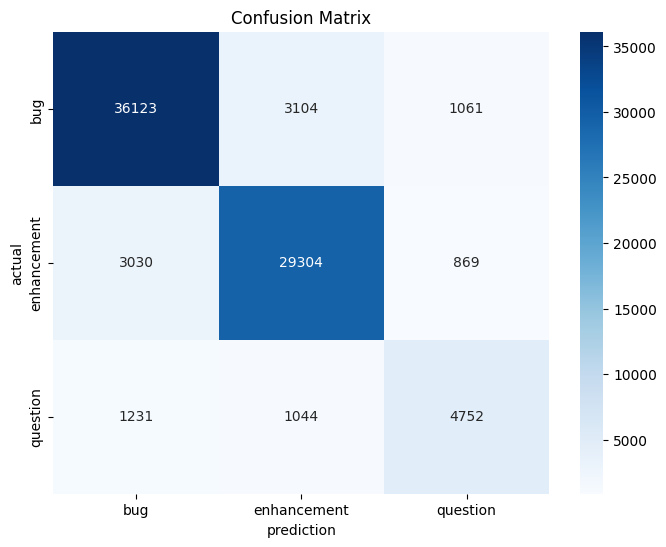

In [39]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

Performance on MSc dataset - bug - enhancement - question

In [40]:
train_msc = pd.read_csv('data/train_bug_ench_question_msc_preprocessing.csv')
test_msc = pd.read_csv('data/test_bug_ench_question_msc_preprocessing.csv')
print('Number of issues: ', train_msc.shape, test_msc.shape)

Number of issues:  (94830, 2) (10537, 2)


In [41]:
msc_dataset = pd.concat([train_msc, test_msc], ignore_index = True)
msc_dataset.reset_index(drop = True, inplace = True)
msc_dataset.shape[0]

105367

In [42]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results_msc, model_outputs_msc, wrong_pred_msc = model.eval_model(msc_dataset, verbose=True, **metrics_recom)
results_msc

----- roberta , duration is: 2h:15m:50s ----- 




  0%|          | 0/105367 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1054 [00:00<?, ?it/s]

{'mcc': 0.7024120147030042,
 'accuracy': 0.8312944280467319,
 'p_micro': 0.8312944280467319,
 'p_macro': 0.7955593172535487,
 'p_w': 0.8271093571062639,
 'r_micro': 0.8312944280467319,
 'r_macro': 0.7472556687776191,
 'r_w': 0.8312944280467319,
 'f_micro': 0.831294428046732,
 'f_macro': 0.7665419476670317,
 'f_w': 0.826608806667836,
 'classificationReport': {'0.0': {'precision': 0.8436241936266188,
   'recall': 0.9208979721501562,
   'f1-score': 0.8805690562980965,
   'support': 56661},
  '1.0': {'precision': 0.8452391386916762,
   'recall': 0.795457669993676,
   'f1-score': 0.8195931780837441,
   'support': 36369},
  '2.0': {'precision': 0.6978146194423511,
   'recall': 0.5254113641890249,
   'f1-score': 0.5994636086192545,
   'support': 12337},
  'accuracy': 0.8312944280467319,
  'macro avg': {'precision': 0.7955593172535487,
   'recall': 0.7472556687776191,
   'f1-score': 0.7665419476670317,
   'support': 105367},
  'weighted avg': {'precision': 0.8271093571062639,
   'recall': 0.83

In [43]:
model_outputs_msc.shape[0]

105367

In [44]:
model_outputs_df_msc = pd.DataFrame(model_outputs_msc, columns = ['bug', 'enhancement', 'question'])
model_outputs_df_msc.head()

bug  enhancement  question
0  3.671875     0.150269 -3.832031
1  4.796875    -2.066406 -2.937500
2  4.847656    -2.187500 -2.904297
3  4.757812    -1.619141 -3.316406
4  4.679688    -1.631836 -3.167969

In [45]:
model_outputs_df_msc['prediction'] = model_outputs_df_msc.apply(get_prediction, axis = 1)
model_outputs_df_msc.head()

bug  enhancement  question  prediction
0  3.671875     0.150269 -3.832031           0
1  4.796875    -2.066406 -2.937500           0
2  4.847656    -2.187500 -2.904297           0
3  4.757812    -1.619141 -3.316406           0
4  4.679688    -1.631836 -3.167969           0

In [46]:
model_outputs_df_msc['actual'] = msc_dataset['labels']

In [47]:
predicted_labels_msc = model_outputs_df_msc['prediction']
actual_labels_msc = model_outputs_df_msc['actual']

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix_msc = confusion_matrix(actual_labels_msc, predicted_labels_msc)
print(confusion_matrix_msc)

[[52179  3006  1476]
 [ 6108 28930  1331]
 [ 3564  2291  6482]]


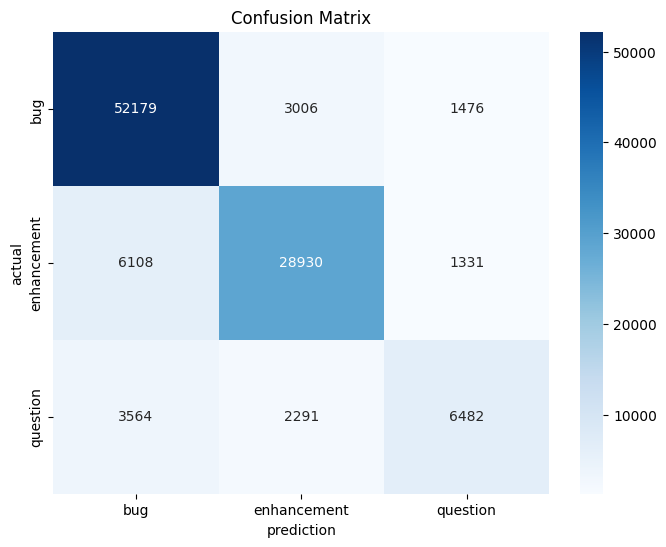

In [50]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_msc,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
prediction_msc = pd.DataFrame(columns = ['text', 'labels', 'actual_labels', 'prediction'])

In [ ]:
prediction_msc['text'] = msc_dataset['text']
prediction_msc['labels'] = msc_dataset['labels']
prediction_msc['actual_labels'] = model_outputs_df_msc['actual']
prediction_msc['prediction'] = model_outputs_df_msc['prediction']
prediction_msc.head()

In [ ]:
prediction_msc.to_csv('data/prediction_msc_bug_ench_ques_msc_preprocessing.csv')

Performance on MSc dataset - bug - enhancement - out-of-scope

In [51]:
train_msc = pd.read_csv('data/train_bug_ench_oos_msc_preprocessing.csv')
test_msc = pd.read_csv('data/test_bug_ench_oos_msc_preprocessing.csv')
print('Number of issues: ', train_msc.shape, test_msc.shape)

Number of issues:  (171392, 2) (19044, 2)


In [52]:
msc_dataset = pd.concat([train_msc, test_msc], ignore_index = True)
msc_dataset.reset_index(drop = True, inplace = True)
msc_dataset.shape[0]

190436

In [53]:
msc_dataset['labels'].value_counts()

labels
2    78480
0    56661
1    36369
3    18926
Name: count, dtype: int64

Removing to-be-checked issues

In [54]:
msc_dataset = msc_dataset[msc_dataset['labels'] != 3]
msc_dataset = msc_dataset.reset_index(drop = True)
msc_dataset.shape[0]

171510

In [55]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results_msc, model_outputs_msc, wrong_pred_msc = model.eval_model(msc_dataset, verbose=True, **metrics_recom)
results_msc

----- roberta , duration is: 2h:18m:39s ----- 




  0%|          | 0/171510 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1716 [00:00<?, ?it/s]

{'mcc': 0.42178498787145524,
 'accuracy': 0.5541426155909276,
 'p_micro': 0.5541426155909276,
 'p_macro': 0.6241411396113364,
 'p_w': 0.6647642114945707,
 'r_micro': 0.5541426155909276,
 'r_macro': 0.6312928593078829,
 'r_w': 0.5541426155909276,
 'f_micro': 0.5541426155909276,
 'f_macro': 0.5291135819547644,
 'f_w': 0.4885704901915792,
 'classificationReport': {'0.0': {'precision': 0.5354932728522901,
   'recall': 0.9208979721501562,
   'f1-score': 0.6772008150445809,
   'support': 56661},
  '1.0': {'precision': 0.5046223617652189,
   'recall': 0.795457669993676,
   'f1-score': 0.6175092583698865,
   'support': 36369},
  '2.0': {'precision': 0.8323077842165004,
   'recall': 0.1775229357798165,
   'f1-score': 0.29263067244982616,
   'support': 78480},
  'accuracy': 0.5541426155909276,
  'macro avg': {'precision': 0.6241411396113364,
   'recall': 0.6312928593078829,
   'f1-score': 0.5291135819547644,
   'support': 171510},
  'weighted avg': {'precision': 0.6647642114945707,
   'recall': 

In [57]:
model_outputs_df_msc = pd.DataFrame(model_outputs_msc, columns = ['bug', 'enhancement', 'out-of-scope'])
model_outputs_df_msc.head()

bug  enhancement  out-of-scope
0  3.671875     0.150269     -3.832031
1  4.796875    -2.066406     -2.937500
2  4.847656    -2.187500     -2.904297
3  4.757812    -1.619141     -3.316406
4  4.679688    -1.631836     -3.167969

In [58]:
def get_prediction_oos(row):
  max_value = row.max()
  if max_value == row['bug']:
    return 0
  elif max_value == row['enhancement']:
    return 1
  elif max_value == row['out-of-scope']:
    return 2

In [59]:
label_names = ['bug', 'enhancement', 'out-of-scope']

In [60]:
model_outputs_df_msc['prediction'] = model_outputs_df_msc.apply(get_prediction_oos, axis = 1)
model_outputs_df_msc.head()

bug  enhancement  out-of-scope  prediction
0  3.671875     0.150269     -3.832031           0
1  4.796875    -2.066406     -2.937500           0
2  4.847656    -2.187500     -2.904297           0
3  4.757812    -1.619141     -3.316406           0
4  4.679688    -1.631836     -3.167969           0

In [61]:
model_outputs_df_msc['actual'] = msc_dataset['labels']

In [66]:
msc_dataset.shape[0]

171510

In [62]:
predicted_labels_msc = model_outputs_df_msc['prediction']
actual_labels_msc = model_outputs_df_msc['actual']

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix_msc = confusion_matrix(actual_labels_msc, predicted_labels_msc)
print(confusion_matrix_msc)

[[52179  3006  1476]
 [ 6108 28930  1331]
 [39154 25394 13932]]


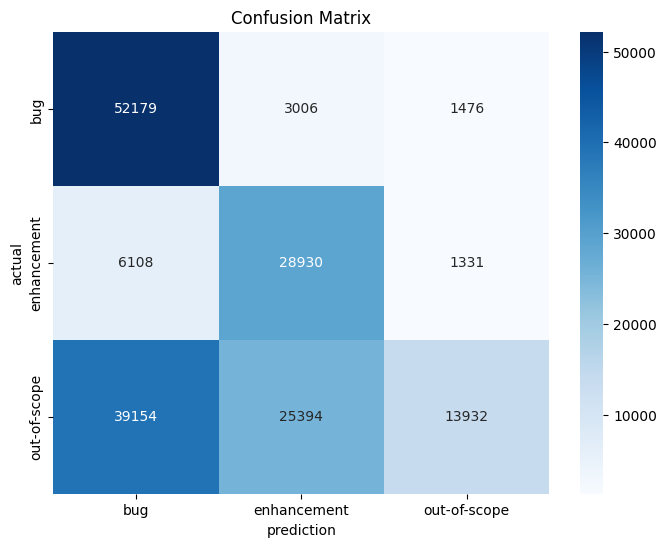

In [65]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_msc,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
prediction_msc = pd.DataFrame(columns = ['text', 'labels', 'actual_labels', 'prediction'])

In [ ]:
prediction_msc['text'] = msc_dataset['text']
prediction_msc['labels'] = msc_dataset['labels']
prediction_msc['actual_labels'] = model_outputs_df_msc['actual']
prediction_msc['prediction'] = model_outputs_df_msc['prediction']
prediction_msc.head()

In [ ]:
prediction_msc.to_csv('data/prediction_msc_bug_ench_oos_msc_preprocessing.csv')